In [2]:
###################
# Peformance Analysis
#  After having played with the data and using sophisticated algorithms, you finally develop a model.
#  But how to analyse and evaluate and rate the performance of your model.
#  There are various performance metrics depending on the type of your problem(classification,regression,etc.)
#  We look into some important figure of merits for a classification(binary) model.
###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as measr
%matplotlib inline

<h3>0. Example Model</h3>
Take a quick glance at the example model and get the gist. It is not important to understand the model completely. To learn more refer to the logistic regression notebook.

<b>Example Model<br>
Titanic Dataset : Binary classification on the chance of survival given passenger details<br>
Get the dataset on https://www.kaggle.com/c/titanic/data <br>
Model : Logistic Regression<br></b>

In [4]:
#Load the training data
train_data = pd.read_csv("Downloads/train.csv")
print(train_data.shape)
train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Reassigning male and female string to more 'modellable' values
for i in range(train_data.shape[0]):
    if(train_data['Sex'][i] == 'male'):
        train_data['Sex'].values[i] = '0'
    if(train_data['Sex'][i] == 'female'):
        train_data['Sex'].values[i] = '1'
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Calculate mean of the ages and fares to fill the NaN values
mean = train_data['Age'].mean(axis = 0, skipna = True)
mean_F = train_data['Fare'].mean(axis = 0, skipna = True)
print(mean)
#Reassigning the NaN values in Age with the mean of the ages
for i in range(train_data.shape[0]):
    if(pd.isnull(train_data['Age'][i]) == True):
        train_data['Age'].values[i] = mean
    if(pd.isnull(train_data['Fare'][i]) == True):
        train_data['Fare'].values[i] = mean_F
train_data.head()

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Isolating trainable features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X_train = np.array([train_data['Pclass'].values, train_data['Age'].values, train_data['SibSp'].values, train_data['Parch'].values, train_data['Sex'].values, train_data['Fare'].values])
Y_train = np.array(train_data['Survived'].values)
print(X_train.shape, Y_train.shape)

(6, 891) (891,)


In [10]:
#Scikit Learn's Logistic Regression Model
logReg = LogisticRegression()
#Fit the model to training data
logReg.fit(X_train.T, Y_train)

LogisticRegression()

In [12]:
#Loading test data
test_data = pd.read_csv("Downloads/test.csv")

#Reassigning male - 0, female - 1 similar to that in train data
for i in range(test_data.shape[0]):
    if(test_data['Sex'][i] == 'male'):
        test_data['Sex'].values[i] = '0'
    if(test_data['Sex'][i] == 'female'):
        test_data['Sex'].values[i] = '1'
        
#Replace NaN in the test data with the mean 
meant = test_data['Age'].mean(axis = 0, skipna = True)
meanf = test_data['Fare'].mean(axis = 0, skipna = True)
for i in range(test_data.shape[0]):
    if(pd.isnull(test_data['Age'][i]) == True):
        test_data['Age'].values[i] = meant
    if(pd.isnull(test_data['Fare'][i]) == True):
        test_data['Fare'].values[i] = meanf

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
#Isolating the same features as train data from the test data
X_test = np.array([test_data['Pclass'].values, test_data['Age'].values, test_data['SibSp'].values, test_data['Parch'].values, test_data['Sex'].values, test_data['Fare'].values])

#Using the trained model to predict values for the above isolate test data
Y_pred = logReg.predict(X_test.T)##Predicted Values

#Load the actual test values
ans_key = pd.read_csv("Downloads/submission.csv")
print(ans_key.shape)
ans_key.head()
Y_test = ans_key['Survived'].values##Actual Values

(418, 2)


<h3> 1. Outcomes and Confusion Matrix</h3>

<p>For a binary classification algorithm, the prediction by the model on a test data example can relate to the actual outcome in one of the following ways :</p> 
 <ol>
   <li> Actual : 1, Predicted : 1 --- True Positive TP
   <li> Actual : 0, Predicted : 1 --- False Postive FP
   <li> Actual : 1, Predicted : 0 --- False Negative FN
   <li> Actual : 0, Predicted : 0 --- True Negative TN
 </ol>
 <p>The number of TPs, FPs, TNs and FNs are counted for the entire set. We compile these results in a tabular form in the CONFUSION MATRIX.</p>
 <table>
    <thead>
        <tr>
            <th>Pred.</th>
            <th>0</th>
            <th>1</th>
        </tr>
        <tr>
            <th>Actual</th>
            <th> </th>
            <th> </th>
        </tr>
    </thead>
    <tbody>
        <tr> 
            <th>0</th>
            <td>#TN</td>
            <td>#FP</td>
        </tr>
        <tr> 
            <th>1</th>
            <td>#FN</td>
            <td>#TP</td>
        </tr>
    </tbody> 
 </table> 

In [14]:
#Manual Computation of Confusion Matrix
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(ans_key.shape[0]):
    if(Y_pred[i] == 1 and ans_key['Survived'][i] == 1):
        tp+=1
    if(Y_pred[i] == 1 and ans_key['Survived'][i] == 0):
        fp+=1
    if(Y_pred[i] == 0 and ans_key['Survived'][i] == 1):
        fn+=1
    if(Y_pred[i] == 0 and ans_key['Survived'][i] == 0):
        tn+=1
print(tn, fp)
print(fn, tp)

#Using sklearn's confusion_matrix
print(measr.confusion_matrix(Y_test, Y_pred))

211 49
52 106
[[211  49]
 [ 52 106]]


<h3>2. Evaluation Metrics - Accuracy, Precision & Recall</h3>

 <p>Now that we have the confusion matrix ready, we will look into precision and recall, some important model evaluation metrics.</p>


 (1) <b>Accuracy</b> is simply the ratio of all correctly classified examples to all the examples. The accuracy measure is intuitive as good estimate of the performance of the model but it is not suited for an imbalanced classification problem which are quite common in everyday applications.
 
 $$
 Accuracy = \frac{True Positives(TP) + True Negatives(TN)}{True Positives(TP) + True Negatives(TN) + False Positives(FP) + False Negatives(TN)}
 $$
   <br>For example, if we have a spam classifier or a disease detection model where the disease rate is low. Suppose in such a problem we may get one or two spam mails or one or two postive patients as opposed to the hundreds of important mails we get or thousands of patients we scan for the disease. 
   <br>In such a case simple accuracy calculation is not a good evaluation strategy since we can get around 95-99% accuracy if we simply label every email as not spam or every patient as negative. But in these problems the positive example space is largely undermined by the more numerous negative examples, however we are more concerned with the performance on postive examples while the accuracy evaluation does not provide any insight into the problem. We turn to a more positive-example emphasizing measures of performance.
 
 
 (2) <b>Recall</b> is the ratio of the correctly identified positives to all the actual postives. It is the measure of the ability of the model to identify all the positive examples.
 
 $$
 Recall = \frac{True Positives(TP)}{True Positives(TP) + False Negatives(FN)}
 $$
<br>A recall value close to 1.00 is an indicator that the model identifies all the positive examples. But there is a caveat, if we know label each email as spam or each patient as diseased then we get a recall of 1 since we never a positive but the model is not actually classifying. By this reasoning we understand that maximizing recall alone cannot guarantee a good classifier. 

 (3) <b>Precision</b> is the ratio of the correctly classified positive examples to all the examples that are either correctly or incorrectly classified as positives. 
 
 $$
 Precision = \frac{True Positives(TP)}{True Positives(TP) + False Positives(FP)}
 $$
 <br>The precision value is actually a measure of the ability of the model to correctly identify only the positive examples in the dataset. Together with recall, we can judge the performance of a classifier.
 <br>In other words, high precision guarantees that no negative examples will be flagged positive while a high recall guarantees all the positive examples will be flagged positive.

In [15]:
#accuracy
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("accuracy : ", accuracy)
#recall
recall = tp/(tp+fn)
print("recall : ", recall)
#precision
precision = tp/(tp+fp)
print("precision : ", precision)

accuracy :  0.7583732057416268
recall :  0.6708860759493671
precision :  0.6838709677419355


In [16]:
# There are library functions in sklearn for precision, recall
print("accuracy : ", measr.accuracy_score(Y_test, Y_pred))
print("recall : ", measr.recall_score(Y_test, Y_pred))
print("precision : ", measr.precision_score(Y_test, Y_pred))

accuracy :  0.7583732057416268
recall :  0.6708860759493671
precision :  0.6838709677419355


<h3>3. Precision-Recall Tradeoff and F1 Score

<p>It is easy to see that our goal is a high precision-high recall model, that is, a model that correctly identifes all positives examples while not misjudging any negative example. This goal now prevents the earlier model where we flagged every mail as spam and every patient as diseased, since this model has a very low precision though the recall is high.</p>
<p>Now on the contrary lets imagine a model that identifies just one positive example correctly. This has a high precision of 1.00 since it has not mislabelled any example as positive but it surely has missed a lot of positive examples and hence its recall is low.</p>
<p>This is the crux of the <b>precision-recall tradeoff</b> that is observed very often in practice.
Whether to emphasize more on high precision or high recall is dependent on the application an the result we desire. For example in the disease detection problem we may desire that no positive(diseased person) is left out and so we may focus on a high recall model than a precision model that misses out a few positve examples. In a spam classifier we may want a high precision model so that the user may not miss any important mail that was misclassified as a positive(spam) than a high recall model that classifies every spam email but may also classify your acceptance letter as spam ;(</p>
<p>Most of the times, the problem may not require extremely high recall or precision, but a balanced maximization of both of them, we combine the two figures in a single performance metric called the <b>F1 Score</b>.</p>

$$
F1\ Score = 2\cdot\frac{Precision \times Recall}{Precision + Recall}
$$
<p>The F1 Score is the harmonic mean of the precision and recall that gives equal weightage to both precision and recall values and the modified goal is to maximize the F1 Score. The harmonic mean penalizes the extreme cases like precision = 1 and recall = 0 and vice versa, thus giving a balanced evaluation metric.</p>

F1 Score(formulae) :  0.6773162939297125
F1 Score(sklearn) :  0.6773162939297125


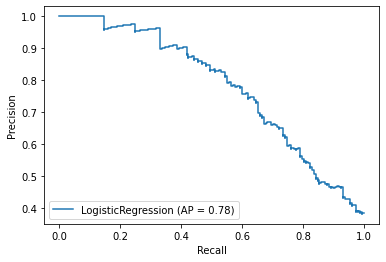

In [17]:
#f1 score
print("F1 Score(formulae) : ", (2 * precision * recall)/(precision + recall))
# From sklearn.metrics library function
print("F1 Score(sklearn) : ", measr.f1_score(Y_test, Y_pred))
## An example of how precision and recall varies with respect to each other
## where the tradeoff can be easily visualised.
measr.plot_precision_recall_curve(logReg, X_test.T, Y_test)

In [18]:
#everything in one go
print(measr.classification_report(Y_test,Y_pred))
##note: in the classification_report output there is precision and recall consider both 0 and 1 as a positive examples

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       260
           1       0.68      0.67      0.68       158

    accuracy                           0.76       418
   macro avg       0.74      0.74      0.74       418
weighted avg       0.76      0.76      0.76       418



<h3>4. Precision and Recall in Multiclass Classification</h3>

<p>The above definitions have been limited to a binary classifier model, but we can easily extend the definition of each of the above to a multiclass classifier model. We take an example of a 4-class classifier{0,1,2,3}</p>

<p>The confusion matrix is then defined as $4\times 4$ matrix $A = [a_{ij}]$ where $a_{ij}$ denotes the number of cases where the predicted class was i but the actual class was j where both $i,j\in \{0,1,2,3\}$</p>
<table>
    <thead>
        <tr>
            <th>Pred.</th>
            <th>$0$</th>
            <th>$1$</th>
            <th>$2$</th>
            <th>$3$</th>
        </tr>
        <tr>
            <th>Actual</th>
        </tr>
    </thead>
    <tbody>
        <tr> 
            <th>$0$</th>
            <td>$a_{00}$</td>
            <td>$a_{10}$</td>
            <td>$a_{20}$</td>
            <td>$a_{30}$</td>
        </tr>
        <tr> 
            <th>$1$</th>
            <td>$a_{01}$</td>
            <td>$a_{11}$</td>
            <td>$a_{21}$</td>
            <td>$a_{31}$</td>
        </tr>
         <tr> 
            <th>$2$</th>
            <td>$a_{02}$</td>
            <td>$a_{12}$</td>
            <td>$a_{22}$</td>
            <td>$a_{32}$</td>
        </tr>
         <tr> 
            <th>$3$</th>
            <td>$a_{03}$</td>
            <td>$a_{13}$</td>
            <td>$a_{23}$</td>
            <td>$a_{33}$</td>
        </tr>
    </tbody> 
 </table> 
 
<p>Now we can define accuracy, recall and precision as a simple extension of the definitions we used above,
<ul>
    <li> Accuracy - truly identified examples divided by the total number of examples.
    <li> Recall - ratio of truly identified positive examples (say category 0) to the actual number of category 0 examples.
    <li> Precision - ratio of truly identified positive examples (category 0) to the all the predicted positives(category 0, here).
</ul>
$$
Accuracy = \frac{\sum_{i=0}^{3} a_{ii}}{\sum_{0\leq i,j\leq 3} a_{ij}}
$$

Note that any class can be considered as a positive example and precision and recall can be calculated from the confusion matrix.
<p> For example, considering 0 as the positive class we can write the formulae for precision and recall as :</p>
<hr>
$$
Recall = \frac{a_{00}}{\sum_{i=0}^{3} a_{i0}}
$$
<hr>
$$
Precision = \frac{a_{00}}{\sum_{i=0}^{3} a_{0i}}
$$

An easy way to get precision and recall is to print the classification report using the above sklearn.metrics function <em>classification_report</em> which calculates the values considering each class a positive turn by turn and then consider the actual positive value.

<h3>5. Precision or Recall</h3>
    <p>We have seen how and why we calculate precision and recall. But how does it help you gain more insight about what your model is doing. Read on.</p>
    <p>After having calculated Precision and Recall, one of the following may result:<P>
    <ul>
        <li><b>High Precision and High Recall</b> - By the definition of the quantities, we conclude that the model is able to correctly identify a significant percent of the positive example successfully without flagging false positives. This situation is generally the goal since the classifier model functions close to expected behavior - it identifies all positives and does not misidentify any negatives.</li>
        <li><b>High Precision and Low Recall</b> - The classifier is able to identify positives very well but it does not identify all the examples present. In other words, it acts cautiously to not to flag any negative as positives but misses a significant amount of positives. We stress on the reducing false positives. Sometimes as noted in the above description a high precision is more important than recall; when you want to be sure that what we flag as positive is indeed positive although we may miss some positives. Like in a spam classifier, we want to label spam with high precision, since its okay if a few spammy mails enter the inbox but no important mail should be falsely labelled spam.</li>
        <li><b>Low Precision and High Recall</b> - This is a dual of the above case, we get most of the positives although there may be a few negatives misclassified as positives. The concern is to identify all the positives, i.e., reducing false negatives. The model is more "insecure" in a sense it labels positives easily but none of the actual positives should be missed. A good examples is a terrorist detection system at an airport, we may want to check all the passengers with little suspicious activity even if they are not terrorists, so that we may not miss any positive(terrorist).</li>
        <li><b>Low Precision and Low Recall</b> - This result implies that the model is not successful, its classification is neither precise nor it is able to flag all the positives. This result implies the model is not working well on the dataset and we need to improve the classification model.</li>

<h3>6. Improving Precision and Recall</h3>
<p> Ways to improve model precision : To increase the precision, we need to reduce the false positives. In a general sense, we need to make the criteria for being a positive more strict and fool-proof. To do this, we need to investigate the relationship of various data fields with respect to it being positive. We may remove unnecessary features in data that may be flagging false positives. </p>
<p> To improve recall we need to again rummage with the features in the data, look closely to the relationship some feature has with actual positives and an include all these features.</p>
<p> It almost never hurts to collect more data, especially about the positive values. More data will help the model better to explore relationships. Another way to try different classifiers like SVMs, K-Neighbors, Decision Trees, Random Forest, etc, or to change the architecture if using neural networks.</p>
<p> Tuning hyperparamters like Lambda, Kernel type, etc can also be helpful in finding the optimal performance of the model</p>

##### The notion of precision and recall is not exactly intuitive like accuracy but in cases of imbalanced data like the few examples where one class of values are rarer, these serve to provide an insight into the performance of the model. ######